In [1]:
import numpy as np
from scipy.special import *
import matplotlib.pyplot as plt

from scipy import optimize

from ipywidgets import interact, interactive, fixed, interact_manual

import warnings
warnings.filterwarnings('ignore')

# fixed νA and ν

In [2]:
# N_1 f(nu_1) + N_2 f(nu_2) = Nb
def fs(x):
    return -x*np.log(x)-(1-x)*np.log(1-x)

x = np.linspace(1e-3,1-1e-3)
# plt.plot(x,fs(x))

ν = 0.45
νA = 0.3
ν1 = np.linspace(1e-3,1-1e-3)

rA = 0.9
r1= 1-1/(2*rA)+0.05

def plotter(rA,r1):
    print("lower bound for r1 in RMT: ", 1-1/(2*rA))
    if ν - rA*νA>=0 and (ν-νA*rA)/(1-rA)<= 1:
        ν1 = np.linspace(1e-3,1-1e-3)
        inds = np.argwhere(νA-r1*ν1>=0) 
        ν1 = ν1[inds[:,0]]
        inds = np.argwhere((νA-r1*ν1)/(1-r1)<=1) 
        ν1 = ν1[inds[:,0]]
        yl = (1-r1)*fs((νA-ν1*r1)/(1-r1))-r1*fs(ν1)
        yr = (1/rA-1)*fs((ν-νA*rA)/(1-rA))
    #     plt.plot(ν1, yl)
    #     plt.plot(ν1, yr+0*yl,"k--")
        def cfunc(x):
            return ((1-r1)*fs((νA-x*r1)/(1-r1))-r1*fs(x)-(1/rA-1)*fs((ν-νA*rA)/(1-rA)))**2
        plt.plot(ν1, cfunc(ν1))

    #     linear_constraint = optimize.LinearConstraint(1, 0, 0.5)
        linear_constraint = optimize.LinearConstraint(1, 0, 0.5)
        xmin = np.max([0,(νA-(1-r1))/r1])
        xmax = np.min([1.0,νA/r1])
        bounds = optimize.Bounds(xmin,xmax)
        x0 = np.array([0.1])
        r_result=optimize.minimize(cfunc, x0,  method='trust-constr', bounds=bounds)# options={'disp': True})

    #     r_result = optimize.fmin_cobyla(cfunc, 0.1, [constr1,constr2,constr3,constr4], rhoend=1e-7)#, disp = False)
    #     r_result = optimize.fmin(cfunc, 0.1)#, disp = False)
    #     print(r_result.x,cfunc(r_result.x))
        if np.abs(r_result.fun)[0]<1e-6:
            plt.plot(r_result.x,cfunc(r_result.x),"ro")
        plt.plot(ν1, ν1*0,"k--")
    #     plt.show()

    else:
        print("null space projection")
        
interact(plotter,rA=(0.50,0.999,0.01), r1=(0.01,0.499,0.01));

# plotter(0.75,0.331)

interactive(children=(FloatSlider(value=0.74, description='rA', max=0.999, min=0.5, step=0.01), FloatSlider(va…

0.501


<ipython-input-280-c38963d8e0d1>:3: RuntimeWarning: invalid value encountered in log
  return -x*np.log(x)-(1-x)*np.log(1-x)


0.75


<ipython-input-280-c38963d8e0d1>:3: RuntimeWarning: invalid value encountered in log
  return -x*np.log(x)-(1-x)*np.log(1-x)
<ipython-input-280-c38963d8e0d1>:3: RuntimeWarning: invalid value encountered in log
  return -x*np.log(x)-(1-x)*np.log(1-x)
<ipython-input-280-c38963d8e0d1>:3: RuntimeWarning: invalid value encountered in log
  return -x*np.log(x)-(1-x)*np.log(1-x)


0.999


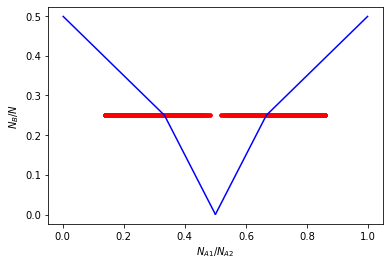

In [281]:

def constr1(x):
    return x
def constr2(x):
    return 1-x

ν = 0.31
νA = 0.2

rA_list = np.linspace(0.501,0.999,3)
r1_list = np.linspace(0.001,0.4999,80)
# rA_list = np.array([0.7])
plt.figure()
for rA in rA_list:
    print(rA)
    r1_z = []
    nu_z = []
    for r1 in r1_list:
        if ν - rA*νA>=0 and (ν-νA*rA)/(1-rA)<= 1:
            def cfunc(x):
                return ((1-r1)*fs((νA-x*r1)/(1-r1))-r1*fs(x)-(1/rA-1)*fs((ν-νA*rA)/(1-rA)))**2

            xmin = np.max([0,(νA-(1-r1))/r1])
            xmax = np.min([1.0,νA/r1])
            bounds = optimize.Bounds(xmin,xmax)
            x0 = np.array([0.1])
            r_result=optimize.minimize(cfunc, x0,  method='trust-constr', bounds=bounds)# options={'disp': True})
        if np.abs(r_result.fun)[0]<1e-6:
                r1_z.append(r1)
                nu_z.append(r_result.x[0])
        if len(r1_z)>0:
            plt.plot(r1_z,1-rA + 0*np.array(r1_z),"r.")
            plt.plot(1-np.array(r1_z),1-rA + 0*np.array(r1_z),"r.")
    #         plt.plot(r1_z,nu_z,"o")
        
plt.plot(1-1/(2*rA_list),1-np.array(rA_list),"b")
plt.plot(1/(2*rA_list),1-np.array(rA_list),"b")
plt.xlabel(r"$N_{A1}/N_{A2}$")
plt.ylabel(r"$N_B/N$")
plt.show()

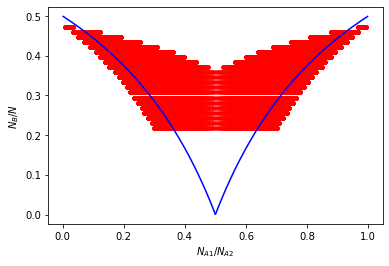

In [301]:
ν = 0.45
νA = 0.3

rA_list = np.linspace(0.501,0.999,100)
r1_list = np.linspace(0.001,0.4999,80)
# rA_list = np.array([0.7])
plt.figure()
for rA in rA_list:
    r1_z = []
    nu_z = []
    for r1 in r1_list:
        if ν - rA*νA>=0 and (ν-νA*rA)/(1-rA)<= 1:
            def cfunc(x):
                return ((1-r1)*fs((νA-x*r1)/(1-r1))-r1*fs(x)-(1/rA-1)*fs((ν-νA*rA)/(1-rA)))**2

#             r_result = optimize.fmin_cobyla(cfunc, 0.3, [constr1,constr2])#, disp = False)
#           if (cfunc(r_result))<1e-6:
#                 r1_z.append(r1)
#                 nu_z.append(r_result)
            r_result = optimize.fmin(cfunc, 0.3, disp = False)
            if (cfunc(r_result[0]))<1e-6:
                r1_z.append(r1)
                nu_z.append(r_result[0])
        if len(r1_z)>0:
            plt.plot(r1_z,1-rA + 0*np.array(r1_z),"r.")
            plt.plot(1-np.array(r1_z),1-rA + 0*np.array(r1_z),"r.")
    #         plt.plot(r1_z,nu_z,"o")
        
plt.plot(1-1/(2*rA_list),1-np.array(rA_list),"b")
plt.plot(1/(2*rA_list),1-np.array(rA_list),"b")
plt.xlabel(r"$N_{A1}/N_{A2}$")
plt.ylabel(r"$N_B/N$")
plt.show()

# fixed νA and νB

In [3]:
# N_1 f(nu_1) + N_2 f(nu_2) = Nb
def fs(x):
    return -x*np.log(x)-(1-x)*np.log(1-x)

x = np.linspace(1e-3,1-1e-3)
# plt.plot(x,fs(x))

νB = 0.5
νA = 0.5
ν1 = np.linspace(1e-3,1-1e-3)

rA = 0.9
r1= 1-1/(2*rA)+0.05

def plotter(rA,r1):
    print("lower bound for r1 in RMT: ", 1-1/(2*rA))
    ν1 = np.linspace(1e-3,1-1e-3)
    yl = (1-r1)*fs((νA-ν1*r1)/(1-r1))-r1*fs(ν1)
    yr = (1/rA-1)*fs(νB)
    print("ν: ", νA*rA + νB*(1-rA))
#     plt.plot(ν1, yl)
#     plt.plot(ν1, yr+0*yl,"k--")
    def cfunc(x):
        return ((1-r1)*fs((νA-x*r1)/(1-r1))-r1*fs(x)-(1/rA-1)*fs(νB))**2
    plt.plot(ν1, cfunc(ν1))

#     linear_constraint = optimize.LinearConstraint(1, 0, 0.5)
    linear_constraint = optimize.LinearConstraint(1, 0, 0.5)
    xmin = np.max([0,(νA-(1-r1))/r1])
    xmax = np.min([1.0,νA/r1])
    bounds = optimize.Bounds(xmin,xmax)
    x0 = np.array([0.1])
    r_result=optimize.minimize(cfunc, x0,  method='trust-constr', bounds=bounds)# options={'disp': True})

#     r_result = optimize.fmin_cobyla(cfunc, 0.1, [constr1,constr2,constr3,constr4], rhoend=1e-7)#, disp = False)
#     r_result = optimize.fmin(cfunc, 0.1)#, disp = False)
#     print(r_result.x,cfunc(r_result.x))
    if np.abs(r_result.fun)[0]<1e-6:
        plt.plot(r_result.x,cfunc(r_result.x),"ro")
    plt.plot(ν1, ν1*0,"k--")
#     plt.show()
    
interact(plotter,rA=(0.50,0.999,0.01), r1=(0.001,0.499,0.001));

interactive(children=(FloatSlider(value=0.74, description='rA', max=0.999, min=0.5, step=0.01), FloatSlider(va…

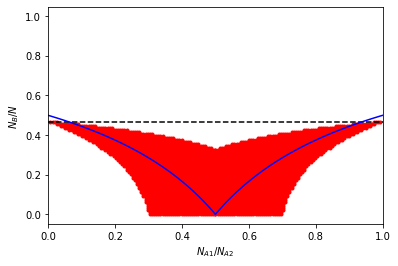

In [7]:
νB = 0.5
νA = 0.3

rA_list = np.linspace(0.001,0.999,100)
r1_list = np.linspace(0.001,0.4999,80)
# rA_list = np.array([0.7])
plt.figure()
for rA in rA_list:
    r1_z = []
    nu_z = []
    for r1 in r1_list:
        def cfunc(x):
            return ((1-r1)*fs((νA-x*r1)/(1-r1))-r1*fs(x)-(1/rA-1)*fs(νB))**2

        r_result = optimize.fmin(cfunc, 0.3, disp = False)
        if (cfunc(r_result[0]))<1e-6:
            r1_z.append(r1)
            nu_z.append(r_result[0])
    if len(r1_z)>0:
        plt.plot(r1_z,1-rA + 0*np.array(r1_z),"r.")
        plt.plot(1-np.array(r1_z),1-rA + 0*np.array(r1_z),"r.")
#         plt.plot(r1_z,nu_z,"o")
        
xx = np.linspace(0,1)
plt.plot(xx,xx*0 + fs(νA)/(fs(νA)+fs(νB)), "k--")
plt.plot(1-1/(2*rA_list),1-np.array(rA_list),"b")
plt.plot(1/(2*rA_list),1-np.array(rA_list),"b")

plt.xlabel(r"$N_{A1}/N_{A2}$")
plt.ylabel(r"$N_B/N$")
plt.xlim(0,1)
plt.show()


# Shreya's setup

In [65]:
# N_1 f(nu_1) + N_2 f(nu_2) = Nb
def fs(x):
    return -x*np.log(x)-(1-x)*np.log(1-x)

x = np.linspace(1e-3,1-1e-3)
# plt.plot(x,fs(x))

ν = 0.5
ν1 = np.linspace(1e-3,1-1e-3)

def plotter(rA=0.45,r1=0.8):
    ν1 = np.linspace(1e-3,1-1e-3)
    inds = np.argwhere(ν-rA*r1*ν1>=0) 
    ν1 = ν1[inds[:,0]]
    inds = np.argwhere((ν-rA*r1*ν1)/(1-rA)<=1) 
    ν1 = ν1[inds[:,0]]
    yl = (1-rA)*fs((ν-rA*ν1*r1)/(1-rA))-rA*r1*fs(ν1)
    yr = (1-r1)*rA
#     plt.plot(ν1, yl)
#     plt.plot(ν1, yr+0*yl,"k--")
    def cfunc(x):
        return ((1-rA)*fs((ν-rA*x*r1)/(1-rA))-rA*r1*fs(x)-(1-r1)*rA*fs(ν2))**2
    
    plt.plot(ν1, cfunc(ν1))

#     linear_constraint = optimize.LinearConstraint(1, 0, 0.5)
    linear_constraint = optimize.LinearConstraint(1, 0, 0.5)
    xmin = (ν-(1-rA))/(r1*rA)
    xmax = np.min([1.0,ν/(r1*rA)])
    bounds = optimize.Bounds(xmin,xmax)
    x0 = np.array([0.5])
    r_result=optimize.minimize(cfunc, x0,  method='trust-constr', bounds=bounds)# options={'disp': True})

    print(r_result.x, r_result.fun[0])
    if np.abs(r_result.fun)[0]<1e-6:
        plt.plot(r_result.x,cfunc(r_result.x),"ro")
    plt.plot(ν1, ν1*0,"k--")
    #     plt.show()
        
interact(plotter,rA=(0.001,0.999,0.001), r1=(0.01,0.999,0.01));

# plotter(0.75,0.331)

interactive(children=(FloatSlider(value=0.45, description='rA', max=0.999, min=0.001, step=0.001), FloatSlider…

In [64]:
ν = 0.5
ν2 = 0.5

rA_list = np.linspace(0.3,0.8,40)
r1_list = np.linspace(0.001,0.999,80)
# rA_list = np.array([0.7])
plt.figure()
for rA in rA_list:
    r1_z = []
    nu_z = []
    for r1 in r1_list:
        def cfunc(x):
            return ((1-rA)*fs((ν-rA*x*r1)/(1-rA))-rA*r1*fs(x)-(1-r1)*rA*fs(ν2))**2

#         r_result = optimize.fmin(cfunc, 0.3, disp = False)
#         if (cfunc(r_result[0]))<1e-6:
        xmin = (ν-(1-rA))/(r1*rA)
        xmax = np.min([1.0,ν/(r1*rA)])
        bounds = optimize.Bounds(xmin,xmax)
        x0 = np.array([0.5])
        r_result=optimize.minimize(cfunc, x0,  method='trust-constr', bounds=bounds)# options={'disp': True})

        if np.abs(r_result.fun)[0]<1e-6:
            r1_z.append(r1)
#             nu_z.append(r_result[0])
    if len(r1_z)>0:
        plt.plot(r1_z,1-rA + 0*np.array(r1_z),"r.")
#         plt.plot(1-np.array(r1_z),1-rA + 0*np.array(r1_z),"r.")
#         plt.plot(r1_z,nu_z,"o")
        
rA_plot = np.linspace(0.001,0.999,100)
plt.plot(1-1/(2*rA_plot),1-np.array(rA_plot),"b")
plt.plot(1/(2*rA_plot),1-np.array(rA_plot),"b")
plt.ylim([0,1])
plt.xlabel(r"$N_{A1}/N_{A2}$")
plt.ylabel(r"$N_B/N$")
plt.xlim(0,1)
plt.grid()
plt.show()


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

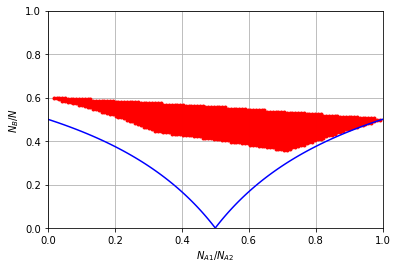

In [70]:
ν = 0.5
ν2 = 0.5

rA_list = np.linspace(0.3,0.8,80)
r1_list = np.linspace(0.001,0.999,120)
# rA_list = np.array([0.7])
plt.figure()
for rA in rA_list:
    r1_z = []
    nu_z = []
    for r1 in r1_list:
        def cfunc(x):
            return ((1-rA)*fs((ν-rA*x*r1)/(1-rA))-rA*r1*fs(x)-(1-r1)*rA*fs(ν2))**2

        r_result = optimize.fmin(cfunc, 0.3, disp = False)
        if (cfunc(r_result[0]))<1e-6:
            r1_z.append(r1)
            nu_z.append(r_result[0])
    if len(r1_z)>0:
        plt.plot(r1_z,1-rA + 0*np.array(r1_z),"r.")
#         plt.plot(1-np.array(r1_z),1-rA + 0*np.array(r1_z),"r.")
#         plt.plot(r1_z,nu_z,"o")
        
rA_plot = np.linspace(0.001,0.999,100)
plt.plot(1-1/(2*rA_plot),1-np.array(rA_plot),"b")
plt.plot(1/(2*rA_plot),1-np.array(rA_plot),"b")
plt.ylim([0,1])
plt.xlabel(r"$N_{A1}/N_{A2}$")
plt.ylabel(r"$N_B/N$")
plt.xlim(0,1)
plt.grid()
plt.show()


# energy constraint

In [16]:
# N_1 f(nu_1) + N_2 f(nu_2) = Nb
def fs(x):
#     return x**0.5
    return np.log(2) - x**2/2

x = np.linspace(1e-3,1-1e-3)
# plt.plot(x,fs(x))

e = 0.5
e2 = 0.5

def plotter(rA,r1):
    e1 = np.linspace(1e-3,5-1e-3)
    inds = np.argwhere(e-rA*r1*e1>=0) 
    e1 = e1[inds[:,0]]
#     inds = np.argwhere((ν-rA*r1*ν1)/(1-rA)<=1) 
#     ν1 = ν1[inds[:,0]]
    def cfunc(x):
        return ((1-rA)*fs((e-rA*x*r1)/(1-rA))-rA*r1*fs(x)-(1-r1)*rA*fs(e2))**2
    
    plt.plot(e1, cfunc(e1))

#     linear_constraint = optimize.LinearConstraint(1, 0, 0.5)
#     linear_constraint = optimize.LinearConstraint(1, 0, 0.5)
    xmin = np.max([0,(e-(1-rA))/(r1*rA)])
    xmax = np.max([(2*np.log(2))**0.5,e/(r1*rA)])
    bounds = optimize.Bounds(xmin,xmax)
    x0 = np.array([0.5])
    r_result=optimize.minimize(cfunc, x0,  method='trust-constr', bounds=bounds)# options={'disp': True})

    print(r_result.x,r_result.fun[0])
    if np.abs(r_result.fun[0])<1e-6:
        plt.plot(r_result.x,r_result.fun[0],"ro")
        e1_sol = r_result.x
        print(e1_sol)
    plt.plot(e1, e1*0,"k--")
    #     plt.show()

        
interact(plotter,rA=(0.001,0.999,0.01), r1=(0.01,0.999,0.01));

# plotter(0.75,0.331)

interactive(children=(FloatSlider(value=0.491, description='rA', max=0.999, min=0.001, step=0.01), FloatSlider…

In [7]:
rA = 0.68
r1 = 0.57
(e-(1-rA))/(r1*rA)

0.4643962848297215

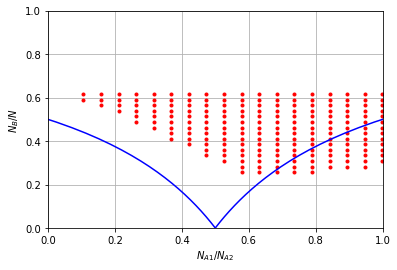

In [17]:
e = 0.5
e2 = 0.5

def fs(x):
#     return x**0.5
    return np.log(2) - x**2/2

rA_list = np.linspace(0.001,0.999,40)
r1_list = np.linspace(0.001,0.999,20)
# rA_list = np.array([0.7])
plt.figure()
for rA in rA_list:
    r1_z = []
    nu_z = []
    for r1 in r1_list:
        def cfunc(x):
            return ((1-rA)*fs((e-rA*x*r1)/(1-rA))-rA*r1*fs(x)-(1-r1)*rA*fs(e2))**2

        r_result = optimize.fmin(cfunc, 0.3, disp = False)
        e1_val = r_result[0]
        if (cfunc(e1_val))<1e-6 and e1_val>0 and e1_val<(2*np.log(2))**0.5:
#         xmin = (ν-(1-rA))/(r1*rA)
#         xmax = np.min([1.0,ν/(r1*rA)])
#         bounds = optimize.Bounds(xmin,xmax)
#         x0 = np.array([0.5])
#         r_result=optimize.minimize(cfunc, x0,  method='trust-constr', bounds=bounds)# options={'disp': True})

#     if np.abs(r_result.fun[0])<1e-6:
            r1_z.append(r1)
            nu_z.append(r_result[0])
    if len(r1_z)>0:
        plt.plot(r1_z,1-rA + 0*np.array(r1_z),"r.")
#         plt.plot(1-np.array(r1_z),1-rA + 0*np.array(r1_z),"r.")
#         plt.plot(r1_z,nu_z,"o")
        
plt.plot(1-1/(2*rA_list),1-np.array(rA_list),"b")
plt.plot(1/(2*rA_list),1-np.array(rA_list),"b")
plt.ylim([0,1])
plt.xlabel(r"$N_{A1}/N_{A2}$")
plt.ylabel(r"$N_B/N$")
plt.xlim(0,1)
plt.grid()
plt.show()
